In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
from collections import Counter
import re
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 24})
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family'] = 'sans-serif'

In [4]:
movies = pd.read_csv('data/movies.csv')
books = pd.read_csv('data/books.csv')

According to the graphics, we can notice the impact of the average rating and number of evaluations on the ranking list of the books and movies.

SpearmanrResult(correlation=-0.6805989698359727, pvalue=2.3155008330216812e-35)
SpearmanrResult(correlation=-0.11886286965535167, pvalue=0.06056929781965371)


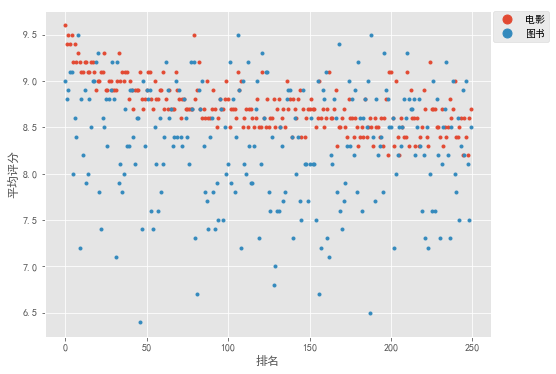

In [5]:
plt.figure(figsize=[8,6])
plt.plot(movies.ratings, '.', label='电影')
plt.plot(books.ratings, '.', label='图书')
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0., numpoints=1, markerscale = 3)
plt.xlabel('排名')
plt.ylabel('平均评分')
print(scipy.stats.spearmanr(movies.ratings, movies['rank']))
print(scipy.stats.spearmanr(books.ratings, books['rank']))

First of all, we can find that the higher the score, the higher the ranking of the movies while it is random of the books.

SpearmanrResult(correlation=-0.6546655786492582, pvalue=5.59478292268556e-32)
SpearmanrResult(correlation=-0.9556242499879997, pvalue=1.2282400247551926e-133)


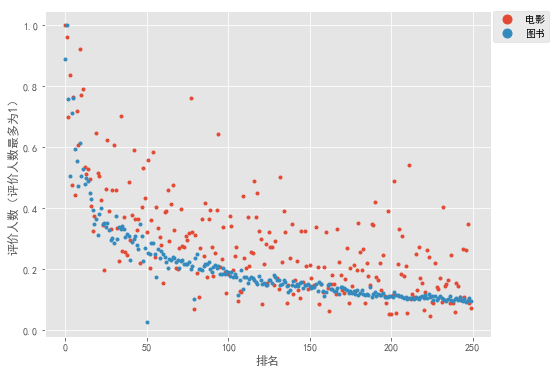

In [5]:
plt.figure(figsize=[8,6])
plt.plot(movies.rating_num/(1.0*movies.rating_num.max()), '.', label='电影')
plt.plot(books.rating_num/(1.0*books.rating_num.max()), '.', label='图书')
plt.legend(bbox_to_anchor=(1.005, 1), loc=2, borderaxespad=0., numpoints=1, markerscale = 3)
plt.xlabel('排名')
plt.ylabel('评价人数（评价人数最多为1）')
print(scipy.stats.spearmanr(movies.rating_num, movies['rank']))
print(scipy.stats.spearmanr(books.rating_num, books['rank']))

Secondly, we can discover that the more people give rate and comment, the higher the ranking of the books.While the movies are less effected by the number of ratings.

In other words, for the movies, the total score is mainly determined by the user's rating score, while for books, the total score is determined almost entirely by the number of ratings or comments. For instance, there is a book rated 6.0 score but it ranks in the front of the ranking list.

Text(0,0.5,'评价人数')

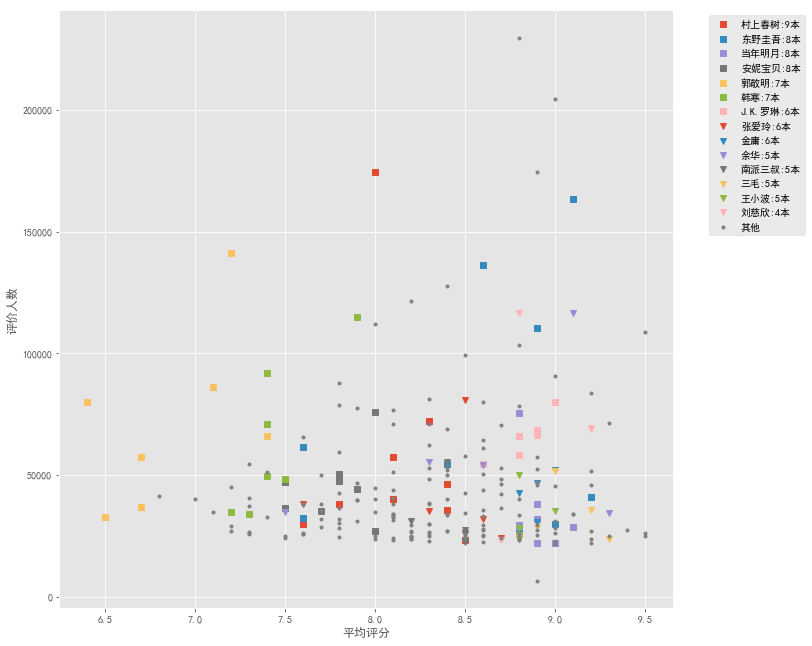

In [10]:
def get_author(meta):
    s = meta.split(' / ')[0]
    s = re.sub(r'(\[.*\])|(（.*）)|(\(.*\))|(〔.*\〕)|(\s*)','',s)
    return s


authors = books.meta.apply(get_author)
author_counter = Counter(authors)
author_counter.most_common()

plt.figure(figsize=[11, 11])
styles = ['s','v','d']
color_num = 7
books['mask'] = False
for i, (author, count) in enumerate(author_counter.most_common()):
    if count <= 3:
        break
    df = books[authors==author]
    books['mask'] = books['mask'] | (authors == author)
    plt.plot(df.ratings, df.rating_num, styles[i//color_num], label='{0}:{1}本'.format(author, count))

plt.plot(books[~books['mask']].ratings, books[~books['mask']].rating_num, '.', color = 'grey', label='其他')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, numpoints  = 1)
plt.xlabel('平均评分')
plt.ylabel('评价人数')

Thirdly, we can found that the most popular the writers are, the most comments or ratings they receive, the high score as well.